<a href="https://colab.research.google.com/github/YousefAbua/Intro-To-ML/blob/main/Homework4/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [557]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [558]:
# Access Cancer Dataset
file_path = '/content/drive/My Drive/Intro to ML/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))

# Identify "NULL" datapoints
cancer.isnull().sum()*100/cancer.shape[0]

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [559]:
# Remove NULL and unncessary data
cancer.pop("Unnamed: 32")
cancer.pop("id")

# Applying binary map to result
# Maligenent 1 (positive)/Benign 0 (negative)
cancer["diagnosis"] = cancer["diagnosis"].map({'M':1,'B':0})

# Assign input variables and results
y = cancer.pop("diagnosis")
x = cancer.values

# Training Set/Testing Set split (80/20)
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,  y, train_size = 0.8)

# Standardize inputs for test and train set
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

k_val = range(1,30)

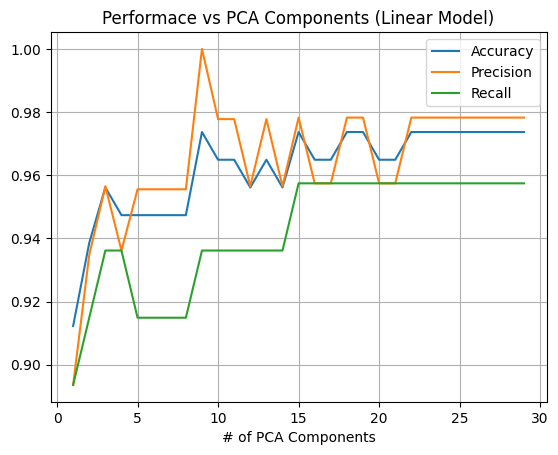

In [560]:
accuracy = []
precision = []
recall = []

# Find optimum K *LINEAR*
for K in k_val:
  # Perform PCA
  pca = PCA(n_components = K)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  model = SVC(kernel = 'linear', C = 1)
  model.fit(x_train_pca, y_train)
  pred = model.predict(x_test_pca)
  accuracy.append(metrics.accuracy_score(y_test, pred))
  precision.append(metrics.precision_score(y_test, pred))
  recall.append(metrics.recall_score(y_test, pred))

plt.plot(k_val, accuracy, label = "Accuracy")
plt.plot(k_val, precision, label = "Precision")
plt.plot(k_val, recall, label = "Recall")

plt.title("Performace vs PCA Components (Linear Model)")
plt.xlabel("# of PCA Components")
plt.grid(True)
plt.legend()

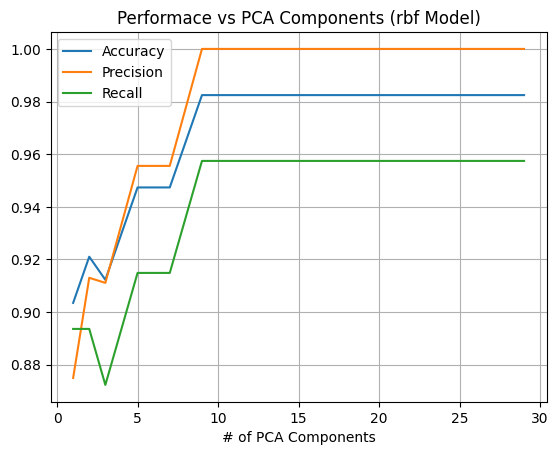

In [561]:
accuracy = []
precision = []
recall = []

# Find optimum K *RBF*
for K in k_val:
  # Perform PCA
  pca = PCA(n_components = K)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  model = SVC(kernel = 'rbf', C = 1)
  model.fit(x_train_pca, y_train)
  pred = model.predict(x_test_pca)
  accuracy.append(metrics.accuracy_score(y_test, pred))
  precision.append(metrics.precision_score(y_test, pred))
  recall.append(metrics.recall_score(y_test, pred))

plt.plot(k_val, accuracy, label = "Accuracy")
plt.plot(k_val, precision, label = "Precision")
plt.plot(k_val, recall, label = "Recall")

plt.title("Performace vs PCA Components (rbf Model)")
plt.xlabel("# of PCA Components")
plt.grid(True)
plt.legend()